## NAM.R : Prédiction par régression de la taille des arbres

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

#df = pd.read_csv(infile, parse_dates={'DATEPLANTATION'}, date_parser=dateparse)

df = pd.read_csv("./les-arbres.csv",sep=";")

In [3]:
df.shape

(222285, 20)

In [4]:
df

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,PEPINIERE,ESPECE,VARIETEOUCULTIVAR,GENRE,DATEPLANTATION,REMARQUABLE,LIBELLEFRANCAIS,OBJECTID,geo_point_2d
0,259118.0,Arbre,Alignement,PARIS 15E ARRDT,NaN,NaN,ALLEE DES CYGNES,000501055,35.0,6.0,J,Inconnue,ornus,NaN,Fraxinus,1700-01-01T01:02:49+00:53,0.0,Frêne à fleurs,5330,"48.854518311, 2.2861409543"
1,263698.0,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,BOULEVARD GOUVION SAINT CYR,000701005,40.0,5.0,A,Inconnue,laevigata,NaN,Crataegus,1987-02-27T02:00:00+01:00,0.0,Aubépine,5332,"48.883505256, 2.28841488344"
2,273084.0,Vide,Alignement,PARIS 18E ARRDT,NaN,NaN,RUE DE LA CHAPELLE,001804002,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5340,"48.8972678801, 2.35955887025"
3,274056.0,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,AVENUE PARMENTIER,002501002,35.0,5.0,J,Inconnue,excelsior,NaN,Fraxinus,1700-01-01T01:02:49+00:53,NaN,Frêne,5342,"48.8691293895, 2.37156070815"
4,275707.0,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,000510003,70.0,15.0,J,Inconnue,tomentosa,NaN,Tilia,1700-01-01T01:02:49+00:53,0.0,Tilleul,5347,"48.8597590839, 2.31151212856"
5,275803.0,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,ESPLANADE DES INVALIDES,000301002,135.0,12.0,A,Inconnue,tomentosa,NaN,Tilia,1700-01-01T01:02:49+00:53,0.0,Tilleul,5348,"48.8609422879, 2.31228924275"
6,276797.0,Arbre,Alignement,PARIS 7E ARRDT,F112 bis,NaN,AVENUE DE SUFFREN,001903009,85.0,13.0,A,Inconnue,x hispanica,NaN,Platanus,1700-01-01T01:02:49+00:53,0.0,Platane,5350,"48.8490843603, 2.30459425912"
7,277577.0,Arbre,Alignement,PARIS 7E ARRDT,8,NaN,AVENUE DE SAXE,000202009,180.0,18.0,A,Inconnue,occidentalis,NaN,Platanus,1700-01-01T01:02:49+00:53,0.0,Platane,5352,"48.8498106561, 2.30749979754"
8,307472.0,Arbre,Jardin,PARIS 8E ARRDT,NaN,NaN,JARDINS DES CHAMPS ELYSEES,00020014,195.0,13.0,NaN,Inconnue,hippocastanum,NaN,Aesculus,1700-01-01T01:02:49+00:53,NaN,Marronnier,5366,"48.8687748682, 2.31242751361"
9,322829.0,Souche,Jardin,PARIS 10E ARRDT,NaN,NaN,SQUARE DES RECOLLETS,00000012,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5367,"48.8738503546, 2.36321915207"


In [5]:
df.columns

Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'PEPINIERE',
       'ESPECE', 'VARIETEOUCULTIVAR', 'GENRE', 'DATEPLANTATION', 'REMARQUABLE',
       'LIBELLEFRANCAIS', 'OBJECTID', 'geo_point_2d'],
      dtype='object')

# Suppression des colonnes semblant sans intérêt

In [6]:
df = df.drop(['IDBASE','ARRONDISSEMENT','COMPLEMENTADRESSE','NUMERO','LIEU / ADRESSE','IDEMPLACEMENT','REMARQUABLE','OBJECTID','geo_point_2d'],axis=1)

In [7]:
train = df[df['HAUTEUR (m)']!=0]

In [8]:
valid = df[df['HAUTEUR (m)']==0]

In [9]:
train.shape

(170510, 11)

In [10]:
valid.shape

(51775, 11)

# Suppression de valeurs aberrantes

In [11]:
train = train.drop(train[train['HAUTEUR (m)']>30].index)
train = train.drop(train[train['CIRCONFERENCEENCM']>1500].index)

# Exploration des données

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


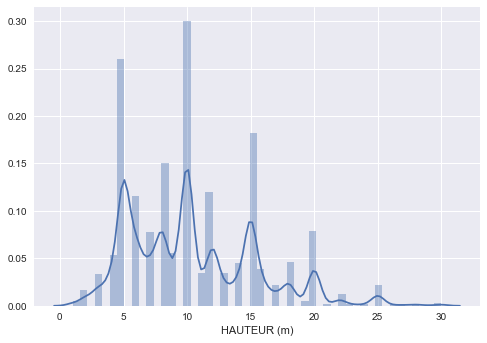

In [12]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set()
sns_plot = sns.distplot(train['HAUTEUR (m)'])
fig = sns_plot.get_figure()

On observe un biais dans les hauteurs. Certains inscrivent la hauteur en multiple de 5.

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


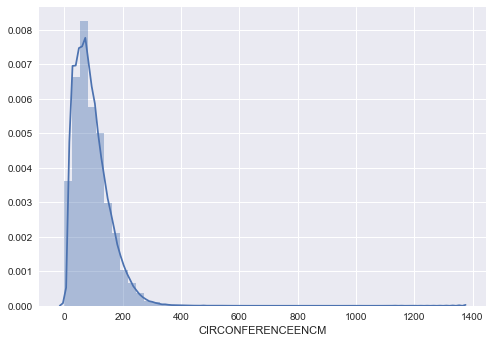

In [13]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set()
sns_plot = sns.distplot(train['CIRCONFERENCEENCM'])
fig = sns_plot.get_figure()

la distribution semble correcte. Distribution asymétrique.

In [14]:
train.describe()

,CIRCONFERENCEENCM,HAUTEUR (m)
count,169882.000000,169882.000000
mean,93.736358,10.406435
std,61.187546,5.101744
min,0.000000,1.000000
25%,50.000000,6.000000
50%,80.000000,10.000000
75%,125.000000,14.000000
max,1360.000000,30.000000


On a une bonne variance sur la circonférence on va la garder.

# Valeurs manquantes

In [15]:
train.shape

(169882, 11)

DOMANIALITE                1
ESPECE                  1153
LIBELLEFRANCAIS         1316
PEPINIERE               5071
STADEDEVELOPPEMENT     38138
VARIETEOUCULTIVAR     140563
dtype: int64

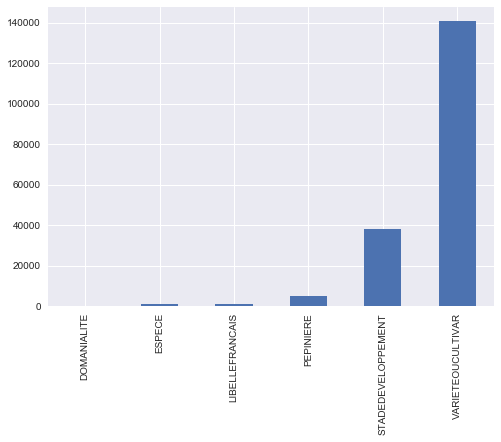

In [16]:
def check_missing(X):
    missing = X.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar()
    plt.savefig("missing.png", dpi=300, bbox_inches='tight')
    return missing
check_missing(train)

On supprime la variable VARIETEOUCULTIVAR, on a trop de données manquantes

In [17]:
train = train.drop('VARIETEOUCULTIVAR',axis=1)
valid = valid.drop('VARIETEOUCULTIVAR',axis=1)

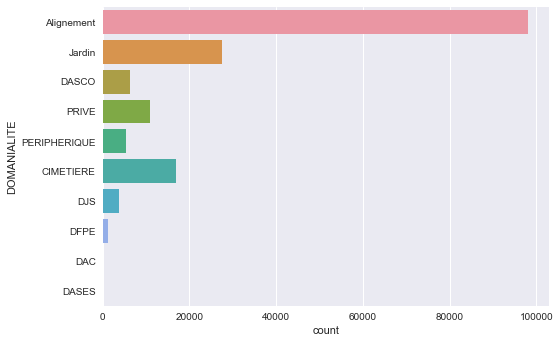

In [18]:
sns_plot = sns.countplot(y=train['DOMANIALITE'],orient='v')
fig = sns_plot.get_figure()

On remplace les données manquantes par les données les plus courantes

In [19]:
train.loc[:, "DOMANIALITE"] = train.loc[:, "DOMANIALITE"].fillna("Alignement")
valid.loc[:, "DOMANIALITE"] = valid.loc[:, "DOMANIALITE"].fillna("Alignement")


On regroupe les catégories avec peu d'observations

In [20]:
train["DOMANIALITE"] =train["DOMANIALITE"].replace({'DFPE':'Other','DAC':'Other','DASES':'Other'})
valid["DOMANIALITE"] =valid["DOMANIALITE"].replace({'DFPE':'Other','DAC':'Other','DASES':'Other'})


In [21]:
def max_count_cat(cat):
    max_count = 0
    max_f = ''
    for f in train[cat].unique():
        count_f = train[train[cat]==f][cat].count()
        if count_f>max_count:
            max_count=count_f
            max_f = f
    return max_f,max_count
max_f_espece, max_count_espece = max_count_cat("ESPECE")
print(max_f_espece,'->',max_count_espece)

x hispanica -> 34186


In [22]:
train.loc[:, "ESPECE"] = train.loc[:, "ESPECE"].fillna("x hispanica")
valid.loc[:, "ESPECE"] = valid.loc[:, "ESPECE"].fillna("x hispanica")

On a beaucoup d'espèce, on va regrouper tout cela

In [23]:
len(train['ESPECE'].unique())

382

In [24]:
def regroup_cat(data,cat,target,size):
    my_cat = list(data[cat].unique())
    agglomerate_cat = pd.DataFrame()
    a=[]
    b=[]
    for cat_ in my_cat:
        if data[data[cat]==cat_][target].count() < 1000:
            a.append(cat_)
            b.append(data[data[cat]==cat_][target].count())
    agglomerate_cat['categories']= a
    agglomerate_cat['count']= b
    c = []
    for cat_ in a:
        c.append(data[data[cat]==cat_][target].mean())
    agglomerate_cat['mean_target']= c
    ordered_cat = agglomerate_cat.sort_values(by="mean_target")
    i=0
    my_replace_cat ={}
    for cat_ in ordered_cat.categories:
        cat_name=cat+str(i//size)
        my_replace_cat[cat_]=cat_name
        i=i+1
    return my_replace_cat


In [25]:
my_replace_espece = regroup_cat(train,'ESPECE','HAUTEUR (m)',80)

In [26]:
train["ESPECE"] =train["ESPECE"].replace(my_replace_espece)
valid["ESPECE"] =valid["ESPECE"].replace(my_replace_espece)

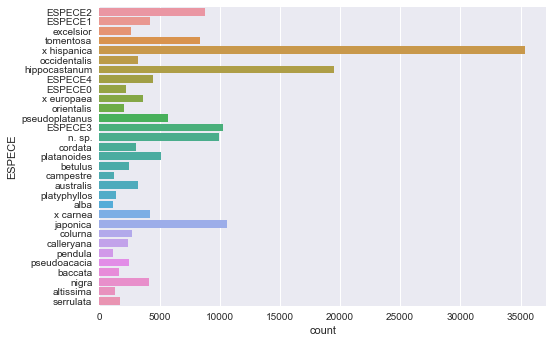

In [27]:
sns_plot = sns.countplot(y=train['ESPECE'],orient='v')
fig = sns_plot.get_figure()

In [28]:
max_f_libelle, max_count_libelle = max_count_cat("LIBELLEFRANCAIS")
print(max_f_libelle,'->',max_count_libelle)

Platane -> 39552


In [29]:
train.loc[:, "LIBELLEFRANCAIS"] = train.loc[:, "LIBELLEFRANCAIS"].fillna("Platane")
valid.loc[:, "LIBELLEFRANCAIS"] = valid.loc[:, "LIBELLEFRANCAIS"].fillna("Platane")

In [30]:
my_replace_libelle = regroup_cat(train,'LIBELLEFRANCAIS','HAUTEUR (m)',80)

In [31]:
train["LIBELLEFRANCAIS"] =train["LIBELLEFRANCAIS"].replace(my_replace_libelle)
valid["LIBELLEFRANCAIS"] =valid["LIBELLEFRANCAIS"].replace(my_replace_libelle)

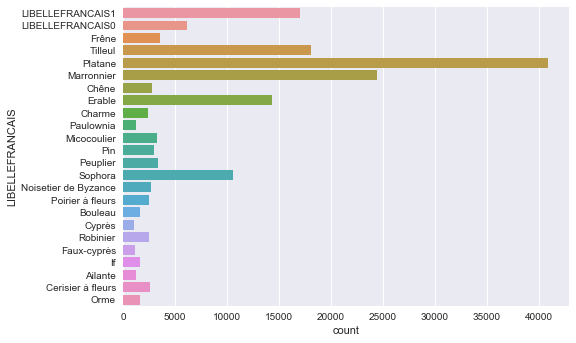

In [32]:
sns_plot = sns.countplot(y=train['LIBELLEFRANCAIS'],orient='v')
fig = sns_plot.get_figure()

In [33]:
max_f_pepiniere, max_count_pepiniere = max_count_cat("PEPINIERE")
print(max_f_pepiniere,'->',max_count_pepiniere)

Inconnue -> 146963


In [34]:
train.loc[:, "PEPINIERE"] = train.loc[:, "PEPINIERE"].fillna("Inconnue")
valid.loc[:, "PEPINIERE"] = valid.loc[:, "PEPINIERE"].fillna("Inconnue")

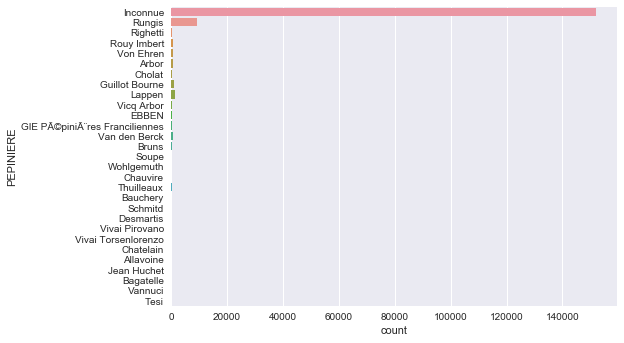

In [35]:
sns_plot = sns.countplot(y=train['PEPINIERE'],orient='v')
fig = sns_plot.get_figure()

Il semble qu'il y ait trop peu de données par catégorie pour PEPINIERE. Je supprime la colonne. Je reviendrai dessus si j'ai le temps.

In [36]:
train = train.drop('PEPINIERE',axis=1)
valid = valid.drop('PEPINIERE',axis=1)

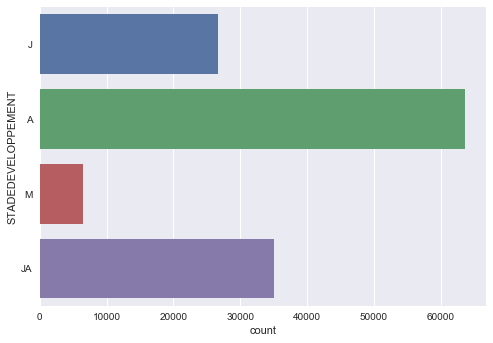

In [37]:
sns_plot = sns.countplot(y=train['STADEDEVELOPPEMENT'],orient='v')
fig = sns_plot.get_figure()

In [38]:
train.loc[:, "STADEDEVELOPPEMENT"] = train.loc[:, "STADEDEVELOPPEMENT"].fillna("A")
valid.loc[:, "STADEDEVELOPPEMENT"] = valid.loc[:, "STADEDEVELOPPEMENT"].fillna("A")

On vérifie que l'on a plus de données manquantes

In [39]:
train.isnull().sum().sum()

0

In [40]:
valid.isnull().sum().sum()

24112

DATEPLANTATION    12048
GENRE             12064
dtype: int64

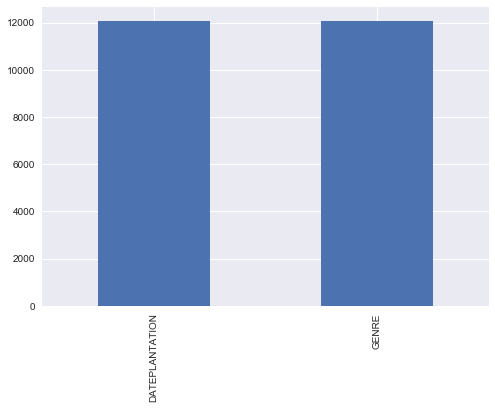

In [41]:
check_missing(valid)

On supprime pour l'instant DATEPLANTATION, c'est surement une donnée importante mais je reviendrai dessus si j'ai le temps

In [42]:
train = train.drop('DATEPLANTATION',axis=1)
valid = valid.drop('DATEPLANTATION',axis=1)

In [43]:
max_f_genre, max_count_genre = max_count_cat("GENRE")
print(max_f_genre,'->',max_count_genre)

Platanus -> 39628


In [44]:
train.loc[:, "GENRE"] = train.loc[:, "GENRE"].fillna("Platanus")
valid.loc[:, "GENRE"] = valid.loc[:, "GENRE"].fillna("Platanus")

In [45]:
valid.isnull().sum().sum()

0

In [46]:
train.columns

Index(['TYPEEMPLACEMENT', 'DOMANIALITE', 'CIRCONFERENCEENCM', 'HAUTEUR (m)',
       'STADEDEVELOPPEMENT', 'ESPECE', 'GENRE', 'LIBELLEFRANCAIS'],
      dtype='object')

In [47]:
num_attribs = list(filter(lambda f: train.dtypes[f] != 'object', train.columns))
cat_attribs = list(filter(lambda f: train.dtypes[f] == 'object', train.columns))

In [48]:
num_attribs

['CIRCONFERENCEENCM', 'HAUTEUR (m)']

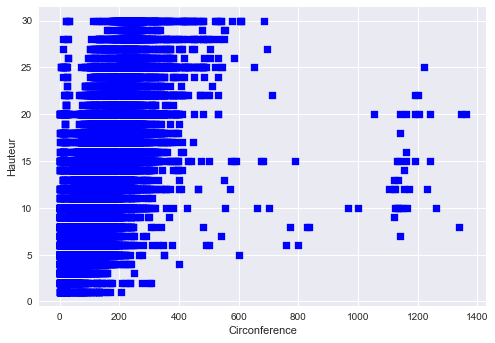

In [49]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train['CIRCONFERENCEENCM'], train['HAUTEUR (m)'], c = "blue", marker = "s")
plt.xlabel("Circonference")
plt.ylabel("Hauteur")
plt.show()

In [50]:
cat_attribs

['TYPEEMPLACEMENT',
 'DOMANIALITE',
 'STADEDEVELOPPEMENT',
 'ESPECE',
 'GENRE',
 'LIBELLEFRANCAIS']

Ca prend trop de temps, je supprime des colonnes. Je n'ai pas le temps de faire une selection des colonnes pour la reductionde de dimension. Je le fais a l'intuition du coup.

In [51]:
train = train.drop('LIBELLEFRANCAIS',axis=1)
valid = valid.drop('LIBELLEFRANCAIS',axis=1)
train = train.drop('GENRE',axis=1)
valid = valid.drop('GENRE',axis=1)
train = train.drop('ESPECE',axis=1)
valid = valid.drop('ESPECE',axis=1)


In [52]:
train.shape

(169882, 5)

# Modélisation par régression et évaluation

In [53]:
y_train = train['HAUTEUR (m)']
all_data = pd.concat((train.drop('HAUTEUR (m)',axis=1),
                      valid.drop('HAUTEUR (m)',axis=1)))

One Hot Encoding des donnees catégorielles

In [54]:
all_data = pd.get_dummies(all_data)

In [55]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data)
#creating matrices for sklearn:
X_train = all_data_scaled[:train.shape[0]]
X_valid = all_data_scaled[train.shape[0]:]


In [56]:
all_data_scaled.shape

(221657, 16)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = cv))
    return(rmse)

In [58]:
#from sklearn.svm import SVR
#from sklearn.feature_selection import RFECV
#model_SVR2 = SVR(kernel='linear', C = 0.25)
#selector = RFECV(model_SVR2, step=1, cv=5)
#selector = selector.fit(X_train, y_train)
#selector.support_

In [59]:
from sklearn.linear_model import ElasticNet
from hyperopt import fmin,tpe,hp,Trials,STATUS_OK

space = {
    'ratio':hp.quniform('ratio',0.0,0.1,0.001),
    'alpha':hp.quniform('alpha',0.0,0.1,0.001)
}

df_result_hyperopt = pd.DataFrame(columns=['score']+list(space.keys()))
i = 0
def objective(params):
    global i
    i +=1
    model_ela = ElasticNet(l1_ratio = params['ratio'],
                          alpha = params['alpha'], 
                          max_iter = 100000,random_state=0)
    score = rmse_cv(model_ela).mean()
#    print("SCORE %s" % score)
    df_result_hyperopt.loc[i,['score']+list(space.keys())] = [score]+list(space.values())
    return {'loss':score,'status':STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space,algo=tpe.suggest,max_evals=20,trials=trials)
print("Best %s" % best)

Best {'alpha': 0.006, 'ratio': 0.084}


RMSE ElasticNet : 3.17441527297


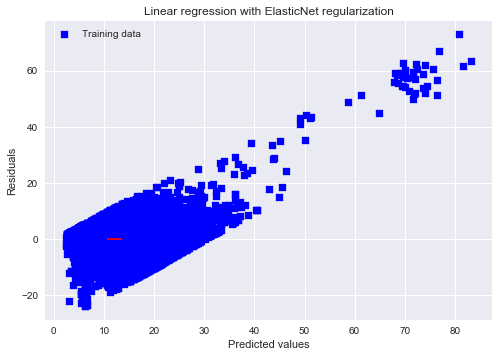

ElasticNet picked 13 features and eliminated the other 3 features


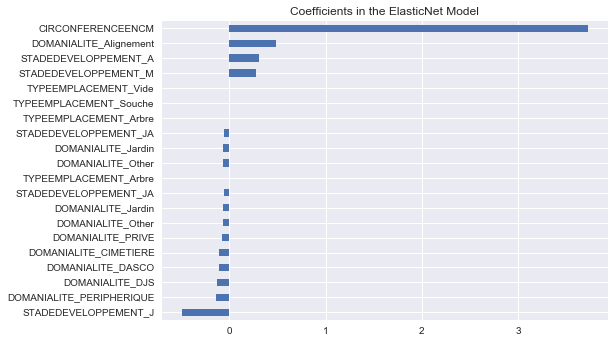

In [61]:
model_ela = ElasticNet(l1_ratio = best['ratio'],
                          alpha = best['alpha'], 
                          max_iter = 50000,random_state=0)
print("RMSE ElasticNet :",rmse_cv(model_ela).mean())
model_ela.fit(X_train, y_train)
y_train_ela = model_ela.predict(X_train)
y_pred_ela = model_ela.predict(X_valid)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(model_ela.coef_, index = all_data.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [65]:
import xgboost as xgb
from hyperopt import fmin,tpe,hp,Trials,STATUS_OK

space = {
    'n_estimators':hp.quniform('n_estimators',100,1000,100),
    'max_depth':hp.quniform('max_depth',6,15,2),
    'min_child_weight':hp.quniform('min_child_weight',4,10,2),
#    'gamma':hp.quniform('gamma',0.0,0.5,0.1),
    'subsample':hp.quniform('subsample',0.5,1.0,0.1),
    'colsample_bytree':hp.quniform('colsample_bytree',0.5,1.0,0.1),
    'reg_alpha':hp.quniform('reg_alpha',0.0,0.3,0.01),
    'learning_rate':hp.quniform('learning_rate',0.0,1.0,0.01),
    
}

df_result_hyperopt = pd.DataFrame(columns=['score']+list(space.keys()))
i = 0
def objective(params):
    global i
    i +=1
    print(params)
    model_xgb = xgb.XGBRegressor(n_estimators=int(params['n_estimators']), max_depth=int(params['max_depth']), \
                                 learning_rate=params['learning_rate'],\
                                 min_child_weight=int(params['min_child_weight']),\
                                 gamma=0.0,subsample=params['subsample'],\
                                 colsample_bytree=params['colsample_bytree'],\
                                 reg_alpha=params['reg_alpha'])
    score = rmse_cv(model_xgb).mean()
    print("SCORE %s" % score)
    df_result_hyperopt.loc[i,['score']+list(space.keys())] = [score]+list(space.values())
    return {'loss':score,'status':STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space,algo=tpe.suggest,max_evals=1,trials=trials)
print("Best %s" % best)

{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.67, 'max_depth': 12.0, 'min_child_weight': 6.0, 'n_estimators': 400.0, 'reg_alpha': 0.3, 'subsample': 0.6000000000000001}
SCORE 2.92830434916
Best {'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.67, 'max_depth': 12.0, 'min_child_weight': 6.0, 'n_estimators': 400.0, 'reg_alpha': 0.3, 'subsample': 0.6000000000000001}


RMSE xgb : 2.92830434916


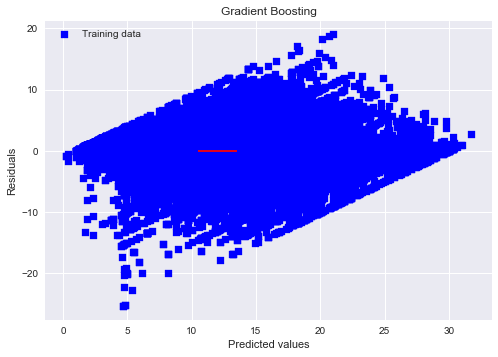

In [66]:
#model_xgb = xgb.XGBRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), learning_rate=best['learning_rate'])
model_xgb = xgb.XGBRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), \
                             learning_rate=best['learning_rate'],\
                             min_child_weight=int(best['min_child_weight']),\
                             gamma=0.0,subsample=best['subsample'],\
                             colsample_bytree=best['colsample_bytree'],\
                             reg_alpha=best['reg_alpha'])
print("RMSE xgb :",rmse_cv(model_xgb).mean())
model_xgb.fit(X_train, y_train)
y_train_xgb = model_xgb.predict(X_train)
y_pred_xgb = model_xgb.predict(X_valid)
# Plot residuals
plt.scatter(y_train_xgb, y_train_xgb - y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Gradient Boosting")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()